<font color='#d90fa0'><b>ASESOR DE MODA - PREDICCIÓN DE PANTALON HOMBRE</b></font>

Para el análisis del asesor de moda se generará el archivo resultante de la predicción la prenda tipo PANTALON_HOMBRE por tipo de cuerpo en ésta sección.

Agregar librerías

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Lectura y revisión de archivo de datos

In [11]:
#Leer archivo
datoscsv = pd.read_csv("C:/Users/David/Dropbox/AI SATURDAYS 2020/PROYECTO FINAL/DSPantMan.csv",encoding='unicode_escape')
print(datoscsv.shape)

(24, 13)


In [12]:
#Reviso estructura de información
datoscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
SEXO             24 non-null object
IDSEXO           24 non-null int64
TIPOCUERPO       24 non-null object
IDTIPOCUERPO     24 non-null int64
TIPO             24 non-null object
IDTIPO           24 non-null int64
MODELO           24 non-null object
IDMODELO         24 non-null int64
LONGITUD         24 non-null object
CORTE            24 non-null object
ANCHURA          24 non-null object
EFECTOVISUAL     24 non-null object
PRENDAAPTA       24 non-null int64
dtypes: int64(5), object(8)
memory usage: 2.6+ KB


In [13]:
#Reviso datos de archivo desde cabecera
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,LONGITUD,CORTE,ANCHURA,EFECTOVISUAL,PRENDAAPTA
0,HOMBRE,0,TIPO V,6,PANTALON,5,PITILLO,1,NORMAL,ESTRECHO,SIMILAR EN RODILLA Y PIERNA,ACENTUAR LAS PIERNAS,1
1,HOMBRE,0,TIPO V,6,PANTALON,5,RECTO,2,NORMAL,AJUSTADO,SIMILAR EN TODA SU LONGITUD,ADELGAZAR A LA PERSONA,0
2,HOMBRE,0,TIPO V,6,PANTALON,5,ANCHO,3,NORMAL,HOLGADO,SIMILAR EN TODA SU LONGITUD,ANCHURA SOBRE LA PERSONA,0
3,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO ALTO,4,NORMAL,AJUSTADO,SIMILAR EN LA CADERA Y PIERNA,DEFINE LA FORMA DEL CUERPO DE LA PERSONA,1
4,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO BAJO,5,NORMAL,RECTO,SIMILAR EN TODA SU LONGITUD,NO PRODUCE EFECTOS,1


<b>Análisis de datos</b>

In [15]:
#armo mi dataset temporal que me ayudará a cambiar los valores string por valores numéricos
FullDataSet = [datoscsv]

1. Reviso si existen datos nulos o vacíos

In [16]:
#reviso los campos en busca de valores Nulos (Nan)
campoConNulos = pd.concat([datoscsv.isnull().sum()], axis=1, keys=['DATASET']) 
print(campoConNulos[campoConNulos.sum(axis=1) > 0])

Empty DataFrame
Columns: [DATASET]
Index: []


**Nota:** No existen datos vacíos

2. Análisis sexo vs prendaapta

In [17]:
#analiza sexo vs prendaapta
datoscsv[['IDSEXO', 'PRENDAAPTA']].groupby(['IDSEXO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDSEXO,PRENDAAPTA
0,0,0.708333


**Nota:** Existe relación entre el sexo y el campo prendaapta

3. Análisis tipo de cuerpo vs prendaapta

In [18]:
#analiza tipo de cuerpo vs prendaapta
datoscsv[['IDTIPOCUERPO', 'PRENDAAPTA']].groupby(['IDTIPOCUERPO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDTIPOCUERPO,PRENDAAPTA
2,8,1.000000
0,6,0.666667
3,9,0.666667
1,7,0.500000


**Nota:** Existe relación entre todos los tipos de cuerpo 

4. Análisis de campo pantalon vs prendaapta

In [20]:
#analiza tipo de prenda vs prendaapta
datoscsv[['IDTIPO', 'PRENDAAPTA']].groupby(['IDTIPO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDTIPO,PRENDAAPTA
0,5,0.708333


**Nota:** existe relación entre tipo de modelo y el campo prendaapta

5. Análisis de modelo de pantalon vs predaapta

In [21]:
#analiza tipo de prenda vs prendaapta
datoscsv[['IDMODELO', 'PRENDAAPTA']].groupby(['IDMODELO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDMODELO,PRENDAAPTA
4,5,1.00
0,1,0.75
3,4,0.75
5,6,0.75
1,2,0.50
2,3,0.50


**Nota:** si existe relación entre el modelo de pantalon y el campo prendaapta

6. Análisis de altura vs prendaapta. El campo altura posee valores tipo string, por lo que deben transformarse en campo entero.

In [22]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['LONGITUD'] == 'CORTO', 'LONGITUD'] = int(1)
    dataset.loc[ dataset['LONGITUD'] == "NORMAL", 'LONGITUD'] = int(2)

In [23]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,LONGITUD,CORTE,ANCHURA,EFECTOVISUAL,PRENDAAPTA
0,HOMBRE,0,TIPO V,6,PANTALON,5,PITILLO,1,2,ESTRECHO,SIMILAR EN RODILLA Y PIERNA,ACENTUAR LAS PIERNAS,1
1,HOMBRE,0,TIPO V,6,PANTALON,5,RECTO,2,2,AJUSTADO,SIMILAR EN TODA SU LONGITUD,ADELGAZAR A LA PERSONA,0
2,HOMBRE,0,TIPO V,6,PANTALON,5,ANCHO,3,2,HOLGADO,SIMILAR EN TODA SU LONGITUD,ANCHURA SOBRE LA PERSONA,0
3,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO ALTO,4,2,AJUSTADO,SIMILAR EN LA CADERA Y PIERNA,DEFINE LA FORMA DEL CUERPO DE LA PERSONA,1
4,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO BAJO,5,2,RECTO,SIMILAR EN TODA SU LONGITUD,NO PRODUCE EFECTOS,1


In [24]:
#longitud vs prendaapta
datoscsv[['LONGITUD', 'PRENDAAPTA']].groupby(['LONGITUD'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,LONGITUD,PRENDAAPTA
0,1,0.75
1,2,0.70


**Nota:** La longitud si tiene relación con el campo prendaapta en pantalon de longitud CORTO y NORMAL

7. Análisis de relación de tipo de cuerpo, longitud y prendaapta

In [25]:
#tipo de cuerpo, altura y prendaapta
datoscsv[['IDTIPOCUERPO','LONGITUD','PRENDAAPTA']].groupby(['IDTIPOCUERPO','LONGITUD'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,LONGITUD,PRENDAAPTA
6,9,1,1.0
7,9,2,0.6
4,8,1,1.0
5,8,2,1.0
2,7,1,0.0
3,7,2,0.6
0,6,1,1.0
1,6,2,0.6


**Nota:** El campo altura si tiene relación   ???

C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

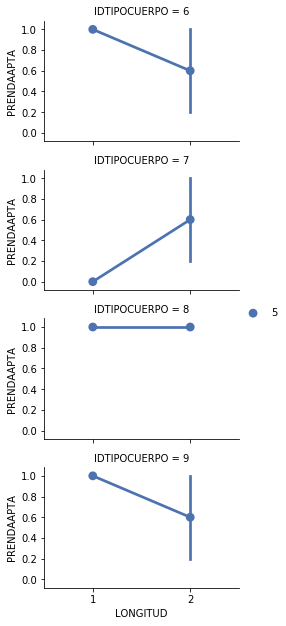

In [27]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'LONGITUD', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con la LONGITUD y el campo prendaapta

8. Análisis de forma vs prendaapta. El campo forma posee valores tipo string, por lo que deben transformarse en campo entero.

In [28]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['CORTE'] == 'ESTRECHO', 'CORTE'] = int(1)
    dataset.loc[ dataset['CORTE'] == "AJUSTADO", 'CORTE'] = int(2)
    dataset.loc[ dataset['CORTE'] == "HOLGADO", 'CORTE'] = int(3)
    dataset.loc[ dataset['CORTE'] == "RECTO", 'CORTE'] = int(4)    

In [29]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,LONGITUD,CORTE,ANCHURA,EFECTOVISUAL,PRENDAAPTA
0,HOMBRE,0,TIPO V,6,PANTALON,5,PITILLO,1,2,1,SIMILAR EN RODILLA Y PIERNA,ACENTUAR LAS PIERNAS,1
1,HOMBRE,0,TIPO V,6,PANTALON,5,RECTO,2,2,2,SIMILAR EN TODA SU LONGITUD,ADELGAZAR A LA PERSONA,0
2,HOMBRE,0,TIPO V,6,PANTALON,5,ANCHO,3,2,3,SIMILAR EN TODA SU LONGITUD,ANCHURA SOBRE LA PERSONA,0
3,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO ALTO,4,2,2,SIMILAR EN LA CADERA Y PIERNA,DEFINE LA FORMA DEL CUERPO DE LA PERSONA,1
4,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO BAJO,5,2,4,SIMILAR EN TODA SU LONGITUD,NO PRODUCE EFECTOS,1


In [30]:
#analiza forma vs prendaapta
datoscsv[['CORTE','PRENDAAPTA']].groupby(['CORTE'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,CORTE,PRENDAAPTA
3,4,1.000
0,1,0.750
1,2,0.625
2,3,0.625


**Nota:** La forma de la prenda si tiene relación con el campo prendaapta.

In [31]:
#analiza tipo de cuerpo,forma,prendaapta
datoscsv[['IDTIPOCUERPO','CORTE','PRENDAAPTA']].groupby(['IDTIPOCUERPO','CORTE'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,CORTE,PRENDAAPTA
12,9,1,1.0
13,9,2,0.5
14,9,3,0.5
15,9,4,1.0
8,8,1,1.0
9,8,2,1.0
10,8,3,1.0
11,8,4,1.0
4,7,1,0.0
5,7,2,0.5


C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


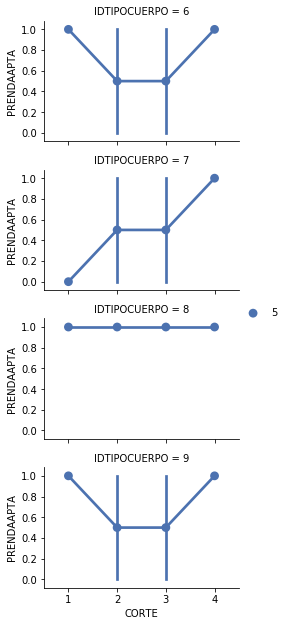

In [33]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'CORTE', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con el corte de la prenda y el campo prendaapta.

9. Análisis de ANCHO DEL PANTALON vs prendaapta. El campo ANCHURA posee valores tipo string, por lo que deben transformarse en campo entero

In [35]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['ANCHURA '] == 'SIMILAR EN RODILLA Y PIERNA', 'ANCHURA '] = 0
    dataset.loc[ dataset['ANCHURA '] == "SIMILAR EN TODA SU LONGITUD", 'ANCHURA '] = 1
    dataset.loc[ dataset['ANCHURA '] == 'SIMILAR EN LA CADERA Y PIERNA', 'ANCHURA '] = 2

In [36]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,LONGITUD,CORTE,ANCHURA,EFECTOVISUAL,PRENDAAPTA
0,HOMBRE,0,TIPO V,6,PANTALON,5,PITILLO,1,2,1,0,ACENTUAR LAS PIERNAS,1
1,HOMBRE,0,TIPO V,6,PANTALON,5,RECTO,2,2,2,1,ADELGAZAR A LA PERSONA,0
2,HOMBRE,0,TIPO V,6,PANTALON,5,ANCHO,3,2,3,1,ANCHURA SOBRE LA PERSONA,0
3,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO ALTO,4,2,2,2,DEFINE LA FORMA DEL CUERPO DE LA PERSONA,1
4,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO BAJO,5,2,4,1,NO PRODUCE EFECTOS,1


In [37]:
#analiza pliegues vs prendaapta
datoscsv[['ANCHURA ','PRENDAAPTA']].groupby(['ANCHURA '], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,ANCHURA,PRENDAAPTA
0,0,0.750000
2,2,0.750000
1,1,0.666667


**Nota:** El ancho del pantalon si tienen mayor peso relacionado directamente con el campo prendaapta

In [38]:
#analiza tipo de cuerpo,pliegues,prendaapta
datoscsv[['IDTIPOCUERPO','ANCHURA ','PRENDAAPTA']].groupby(['IDTIPOCUERPO','ANCHURA '], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,ANCHURA,PRENDAAPTA
9,9,0,1.000000
10,9,1,0.333333
11,9,2,1.000000
6,8,0,1.000000
7,8,1,1.000000
8,8,2,1.000000
3,7,0,0.000000
4,7,1,1.000000
5,7,2,0.000000
0,6,0,1.000000


C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


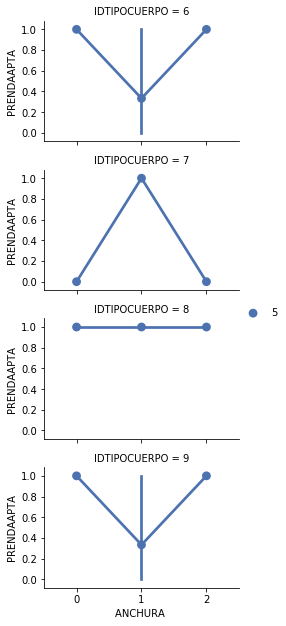

In [40]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'ANCHURA ', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()
##################################3

**Nota:** El tipo de cuerpo si tiene relación con los ANCHURA de la prenda y el campo prendaapta.

10. Análisis de EFECTOVISUAL vs prendaapta. El campo posee valores tipo string, por lo que deben transformarse en campo entero.

In [44]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['EFECTOVISUAL '] == 'ACENTUAR LAS PIERNAS', 'EFECTOVISUAL '] = 0
    dataset.loc[ dataset['EFECTOVISUAL '] == "ADELGAZAR A LA PERSONA", 'EFECTOVISUAL '] = 1
    dataset.loc[ dataset['EFECTOVISUAL '] == "ANCHURA SOBRE LA PERSONA", 'EFECTOVISUAL '] = 2
    dataset.loc[ dataset['EFECTOVISUAL '] == "DEFINE LA FORMA DEL CUERPO DE LA PERSONA", 'EFECTOVISUAL '] = 3
    dataset.loc[ dataset['EFECTOVISUAL '] == "NO PRODUCE EFECTOS ", 'EFECTOVISUAL '] = 4

In [45]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,LONGITUD,CORTE,ANCHURA,EFECTOVISUAL,PRENDAAPTA
0,HOMBRE,0,TIPO V,6,PANTALON,5,PITILLO,1,2,1,0,0,1
1,HOMBRE,0,TIPO V,6,PANTALON,5,RECTO,2,2,2,1,1,0
2,HOMBRE,0,TIPO V,6,PANTALON,5,ANCHO,3,2,3,1,2,0
3,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO ALTO,4,2,2,2,3,1
4,HOMBRE,0,TIPO V,6,PANTALON,5,TIRO BAJO,5,2,4,1,4,1


In [46]:
#analiza EFECTOS vs prendaapta
datoscsv[['EFECTOVISUAL ','PRENDAAPTA']].groupby(['EFECTOVISUAL '], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,EFECTOVISUAL,PRENDAAPTA
4,4,1.00
0,0,0.75
3,3,0.75
1,1,0.50
2,2,0.50


**Nota:** Los EFECTOS de la prenda SI tienen mayor peso relacionado directamente con el campo prendaapta

In [47]:
#tipo de cuerpo,vuelos,prendaapta
datoscsv[['IDTIPOCUERPO','EFECTOVISUAL ','PRENDAAPTA']].groupby(['IDTIPOCUERPO','EFECTOVISUAL '], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,EFECTOVISUAL,PRENDAAPTA
19,9,4,1
18,9,3,1
17,9,2,0
16,9,1,0
15,9,0,1
11,8,1,1
14,8,4,1
13,8,3,1
12,8,2,1
10,8,0,1


C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\David\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


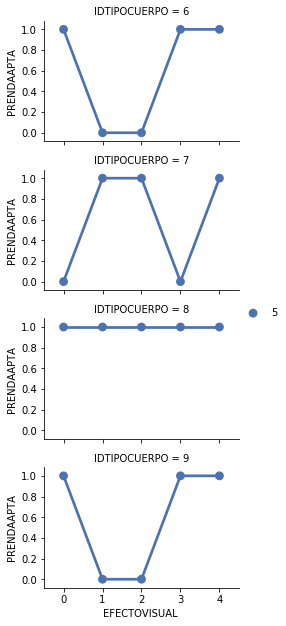

In [50]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'EFECTOVISUAL ', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con los EFECTOS de la prenda y el campo prendaapta.

12. Limpieza de campos tipo string de dataset de análisis final

In [51]:
#elimino campos tipo string de dataset
datoscsv = datoscsv.drop(['SEXO', 'TIPOCUERPO', 'TIPO', 'MODELO'], axis=1)

In [52]:
#reviso tipo de datos final
datoscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
IDSEXO           24 non-null int64
IDTIPOCUERPO     24 non-null int64
IDTIPO           24 non-null int64
IDMODELO         24 non-null int64
LONGITUD         24 non-null int64
CORTE            24 non-null int64
ANCHURA          24 non-null int64
EFECTOVISUAL     24 non-null int64
PRENDAAPTA       24 non-null int64
dtypes: int64(9)
memory usage: 1.8 KB


**Definición de Variables**

In [53]:
#revisión de columnas de dataset
print(datoscsv.columns.values)

['IDSEXO' 'IDTIPOCUERPO' 'IDTIPO' 'IDMODELO' 'LONGITUD' 'CORTE' 'ANCHURA '
 'EFECTOVISUAL ' 'PRENDAAPTA']


In [54]:
#establecer dataset de variables a predecir
X_train = datoscsv.drop("PRENDAAPTA", axis=1)
Y_train = datoscsv["PRENDAAPTA"]
X_test = datoscsv.drop("IDTIPOCUERPO", axis=1).copy()

In [55]:
#presento filas y columnas de dataset a predecir
X_train.shape, Y_train.shape, X_test.shape

((24, 8), (24,), (24, 8))

**Análisis de Algoritmos**

Busco algoritmo que tenga mejor porcentaje de predicción

**Logistic Regression**

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**SVC**

In [57]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**KNeighborsClassifier**

In [58]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**GaussianNB**

In [59]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Perceptron**

In [60]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


**DecisionTreeClassifier**

In [61]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**RandomForestClassifier**

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [64]:
#Agrupo resultados en una variable para seleccionar el modelo que usaré para la predicción final
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_decision_tree]})
#Ordeno por resultado
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,79.17
0,Support Vector Machines,70.83
2,Logistic Regression,70.83
4,Naive Bayes,70.83
5,Perceptron,70.83


**Resultado:**

De los modelos analizados 2 se aplican mejor a la predicción pero elegiré para la aplicación final a <font color="green">Random Forest</font>

In [65]:
#genero archivo de resultados del modelo que será leído luego de la ejecución del botón click "Generar" de la aplicación
submission = pd.DataFrame({
        "IDMODELO": datoscsv["IDMODELO"],
        "IDTIPOCUERPO": datoscsv["IDTIPOCUERPO"],
        "PRENDAAPTA": Y_pred
    })
submission.to_csv('C:/Users/David/Dropbox/AI SATURDAYS 2020/PROYECTO FINAL/DSPantManPredicted.csv', index=False)


print('Archivo generado')

Archivo generado
